# Sales Analysis

## Equations

`Revenue = Price * Quantity * (1 + State Tax Rate)`
`Gross Profit = (Price - Cost) * Quantity)`
`Net Profit = Gross Profit - Expenses`

---
## Data Files

### Business Data Files
https://cs.indstate.edu/~lmay1/assets/sales-data/customers.csv
https://cs.indstate.edu/~lmay1/assets/sales-data/expenses.csv
https://cs.indstate.edu/~lmay1/assets/sales-data/products.csv
https://cs.indstate.edu/~lmay1/assets/sales-data/tax.csv

### 12 Months of Sales Data (12 files, 01 is January, etc.)
https://cs.indstate.edu/~lmay1/assets/sales-data/sales-01.csv
https://cs.indstate.edu/~lmay1/assets/sales-data/sales-02.csv
...
https://cs.indstate.edu/~lmay1/assets/sales-data/sales-11.csv
https://cs.indstate.edu/~lmay1/assets/sales-data/sales-12.csv

---
## Charts to Create

### 1. Customer Data Stats
1. Percent of `FirstName` fields are left blank?
2. Percent of `LastName` fields are left blank?
3. Percent of `Zip` fields are left blank?
4. Percent of `State` fields are left blank?
5. Percent of `Zip` and `State`fields switched?

### 2. Monthly Total Net Profits
Create a matplotlib line graph of total net profit across all products, where the x-axis contains each month of the year. Display on the graph both the min and max dollar amount for the total net profit.


### 3. Monthly Gross Profits per Product
Create a matplotlib line graph of gross profits for each product, where the x-axis contains each month of the year. Label your axes and create a legend of colors for each of the product lines.


### 4. Annual Revenue vs Gross Profit per Product 
Create a matplotlib 2-bar chart for the annual dollar amounts in the 2 categories total revenue and gross profit for each product. The x-axis should be the products, and the y-axis should be dollars. Display on the graph the best selling item and associated dollar value, and the worst selling item and associated dollar value.

---
# Code Setup

In [1]:
import pandas as pd

url_prefix = "https://cs.indstate.edu/~lmay1/assets/sales-data/"

States = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "": "",
}

states_df = pd.DataFrame(States.items(), columns=["Abbreviation", "State"])
states_df.set_index("Abbreviation", inplace=True)
states_df.head(5)

,State
Abbreviation,
AL,Alabama
AK,Alaska
AZ,Arizona
AR,Arkansas
CA,California


In [2]:
Months = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
months = pd.Series(Months)
months

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
dtype: object

---
# Customer Data Stats

### 1. Percent of `FirstName` fields are left blank?

In [3]:
customers = pd.read_csv(url_prefix+"customers.csv")
customers["CustomerId"]= customers["CustomerId"].astype(str)
customers.set_index("CustomerId", inplace=True)
customers.head(5)

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1000,Christina,Wilkerson,881 Midland St,Appleton,WI,54911
1001,Arthur,Robles,543 Flanty Terr,Seattle,WA,98109
1002,Brenton,Carpenter,184 Erming Ln,Arlington,TX,76010
1003,Rosalie,Vincent,937 Potter Rd,Berkeley,CA,94704
1004,Loretta,Glass,264 Sharon Rd,Sunnyvale,CA,94086


In [4]:
customers[customers["FirstName"].isna()]

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1011,NaN,Palmer,654 Plinfate St,Vancouver,NaN,98661
1022,NaN,Everett,711 Wommert Ln,Anderson,IN,46018
1039,NaN,Howe,261 Willow Rd,Roanoke,VA,24022
1043,NaN,Malone,38 Lincoln Rd,Rome,GA,30161
1057,NaN,Myers,39 Henly Dr,Orange,NJ,07051
...,...,...,...,...,...,...
2152,NaN,Hodge,737 Anton Dr,Akron,OH,44309
2158,NaN,Sullivan,41 Pleasant View Dr,Passaic,NJ,07055
2189,NaN,Park,469 Midland St,Passadena,CA,91109


In [5]:
field = "FirstName"
fn=len(customers[customers[field].isna()])
t=len(customers)

firstname =(fn/t)*100

print(f"{firstname:.2f} % missing \"{field}\" fields.")

5.25 % missing "FirstName" fields.



---
### 2. Percent of `LastName` fields are left blank?

In [6]:
customers[customers["LastName"].isna()].head(5)

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1012,Dusty,NaN,919 North Hampton St,Addison,IL,60101
1037,Judith,NaN,238 Cooper St,Miami,FL,33152
1121,Marylou,NaN,307 Kennel Ln,Emporia,KS,66801
1168,Bette,NaN,213 Tomkins Blcd,Auburn,NY,13021
1224,Eliza,NaN,175 Bryant Blvd,Gary,IN,46401


In [7]:
field = "LastName"
fn=len(customers[customers[field].isna()])
t=len(customers)

lastname =(fn/t)*100

print(f"{lastname:.2f} % missing \"{field}\" fields.")

3.18 % missing "LastName" fields.


---
### 3. Percent of `Zip` fields are left blank?

In [8]:
customers[customers["Zip"].isna()].head(5)

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1260,Josue,Marks,223 Freeland Ave,Vancouver,WA,NaN
1353,Ethan,Avery,790 Stonehedge Blvd,Seattle,WA,NaN
1356,Charlie,Conrad,70 Dorwin Rd,Rome,GA,NaN
1517,Evelyn,Boyer,188 Pleasant View Dr,Albany,NY,NaN
1589,Concepcion,Wilcox,451 Henly Dr,Biloxi,MS,NaN


In [9]:
field = "Zip"
fn=len(customers[customers[field].isna()])
t=len(customers)

zipcode =(fn/t)*100

print(f"{zipcode:.2f} % missing \"{field}\" fields.")

1.27 % missing "Zip" fields.


---
### 4. Percent of `State` fields are left blank?

In [10]:
customers[customers["State"].isna()].head(5)

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1011,NaN,Palmer,654 Plinfate St,Vancouver,NaN,98661
1017,Damon,White,452 Lemoyer Blvd,Clearwater,NaN,33575
1050,Irma,Stafford,724 Spring County Blvd,Kinston,NaN,28501
1104,Lisa,Stafford,784 Lake Dr,Ames,NaN,50010
1276,Kitty,Monroe,916 Tulip St,Galveston,NaN,77553


In [11]:
field = "State"
fn=len(customers[customers[field].isna()])
t=len(customers)

state =(fn/t)*100

print(f"{state:.2f} % missing \"{field}\" fields.")

2.15 % missing "State" fields.


---
### 5. Percent of `Zip` and `State`fields switched?

In [12]:
customers[customers["State"].astype(str).str.isnumeric()].head()

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1170,Billie,Terrell,669 Southern Dr,Chicago,60607,IL
1184,Kristine,Callahan,292 Lake Dr,Emporia,66801,KS
1244,Hollie,Camacho,389 Main St,Chicago,60607,IL
1342,Nadia,Little,227 Darly Rd,Yonkers,10701,NY
1484,Bill,Bass,787 Plymth Terr,Sunnyvale,94086,CA


In [13]:
customers[customers["Zip"].isin(States.keys())].head()

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1170,Billie,Terrell,669 Southern Dr,Chicago,60607,IL
1184,Kristine,Callahan,292 Lake Dr,Emporia,66801,KS
1244,Hollie,Camacho,389 Main St,Chicago,60607,IL
1342,Nadia,Little,227 Darly Rd,Yonkers,10701,NY
1484,Bill,Bass,787 Plymth Terr,Sunnyvale,94086,CA


In [14]:
swapped = customers[customers["State"].astype(str).str.isnumeric() & customers["Zip"].isin(States.keys())]
swapped.head()

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1170,Billie,Terrell,669 Southern Dr,Chicago,60607,IL
1184,Kristine,Callahan,292 Lake Dr,Emporia,66801,KS
1244,Hollie,Camacho,389 Main St,Chicago,60607,IL
1342,Nadia,Little,227 Darly Rd,Yonkers,10701,NY
1484,Bill,Bass,787 Plymth Terr,Sunnyvale,94086,CA


In [15]:
len(swapped)

17

In [19]:
field1 = "State"
field2 = "Zip"
fn=len(swapped)
t=len(customers)

swappedvalues =(fn/t)*100
print(f"{swappedvalues:.2f} % swapped \"{field1}\" and \"{field2}\" fields.")

1.35 % swapped "State" and "Zip" fields.


## Customer Data Bar Chart

In [17]:
import matplotlib.pyplot as plt
import numpy as np

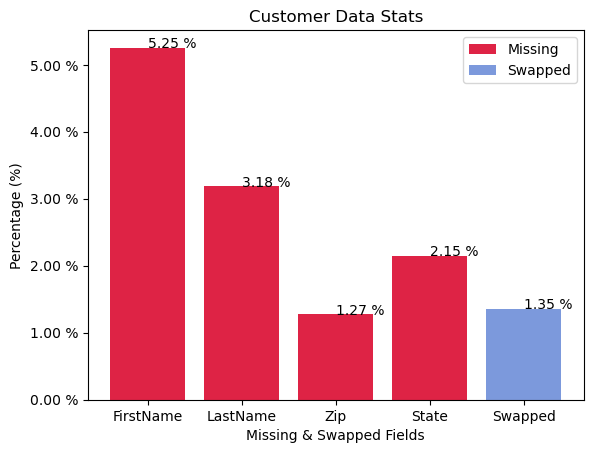

In [23]:
fields = ["FirstName", "LastName", "Zip", "State"]
percentage= [firstname, lastname, zipcode, state]

f = ["FirstName", "LastName", "Zip", "State", "Swapped"]
p= [firstname, lastname, zipcode, state, swappedvalues]
lit=[0, 1, 2, 3, 4, 5]
li = [f"{y:.2f} %" for y in lit]
plt.bar(fields,percentage, color="#de2345", label="Missing")
plt.bar("Swapped", swappedvalues, color ="#7c99dc", label="Swapped")

# chart
plt.legend(loc="upper right")
plt.title("Customer Data Stats")
plt.xlabel("Missing & Swapped Fields")
plt.ylabel("Percentage (%)")

plt.yticks(lit,li)

def add_label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],f"{y[i]:.2f} %")
add_label(f,p)

plt.show()

---
# Clean Data

## Swap `State` and `Zip` Fields

In [24]:
swapped = swapped.copy()
customers.loc[customers["Zip"].isin(states_df.index), "State"] = swapped["Zip"]
customers.loc[customers["Zip"].isin(states_df.index), "Zip"] =  swapped["State"]
customers.loc[customers["Zip"].isin(states_df.index)]

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,


## Set `NaN` Fields in `State` to `""`

In [25]:
customers.loc[customers["State"].isna(), "State"]=""
customers[customers["State"] == ""].head()

,FirstName,LastName,StreetAddress,City,State,Zip
CustomerId,,,,,,
1011,NaN,Palmer,654 Plinfate St,Vancouver,,98661
1017,Damon,White,452 Lemoyer Blvd,Clearwater,,33575
1050,Irma,Stafford,724 Spring County Blvd,Kinston,,28501
1104,Lisa,Stafford,784 Lake Dr,Ames,,50010
1276,Kitty,Monroe,916 Tulip St,Galveston,,77553


## Tax Rates

In [26]:
tax_rates=pd.read_csv(url_prefix+"tax.csv", index_col="State")
tax_rates.head()

,Rate,Rank
State,,
Alabama,4%,9.0
Alaska,NaN,44.0
Arizona,5.6%,12.0
Arkansas,6.5%,5.0
California,6%,6.0


### Drop Rank Field

In [27]:
tax_rates.drop("Rank", axis=1, inplace=True)

## Set `NaN` Fields in `Rate` to `0.0`

In [28]:
tax_rates.loc[tax_rates["Rate"].isna(), "Rate"]=0.0
tax_rates.loc[""]=0.0
tax_rates[tax_rates["Rate"] == 0.0]

,Rate
State,
Alaska,0.0
Delaware,0.0
Montana,0.0
New Hampshire,0.0
Oregon,0.0
,0.0


### Strip `%` Symbol and Convert Values to Numeric

In [29]:
tax_rates.loc[:,"Rate"]=tax_rates["Rate"].astype(str).str.strip("%").apply(pd.to_numeric).apply(lambda x: x/100)
tax_rates.head()

,Rate
State,
Alabama,0.04
Alaska,0.0
Arizona,0.056
Arkansas,0.065
California,0.06


## Products

In [30]:
products=pd.read_csv(url_prefix+"products.csv", index_col="ProductId")
products.head()

,Price,Cost
ProductId,,
Widget,5.50,2.83
Fidget,12.99,6.81
Trinket,7.75,6.42
Gadget,9.99,4.13
Gizmo,7.77,3.27


## Sales

In [34]:
sales=[pd.read_csv(f"{url_prefix}sales-{i:0>2}.csv", dtype={"CustomerId": str})for i in range(1, 13)]
sales[1].head()

,InvoiceNumber,CustomerId,Date,ProductId,Quantity
0,8740,1757,2020-02-01,Widget,2
1,8740,1757,2020-02-01,Gadget,14
2,8740,1757,2020-02-01,Gewgaw,15
3,8741,1800,2020-02-01,Doodad,14
4,8741,1800,2020-02-01,Gewgaw,9


In [35]:
def get_monthly_revenue(month):
    df =month.copy()
    df.drop(["Date", "InvoiceNumber"], axis=1, inplace=True)
    df = pd.merge(df, products, left_on="ProductId", right_index=True, how="outer")
    df.drop("ProductId", axis=1, inplace=True)
    df=pd.merge(df, customers["State"], left_on="CustomerId", right_index=True, how="outer")
    df.drop("CustomerId", axis=1, inplace=True)
    df.rename(columns={"State": "Abbreviation"}, inplace=True)
    df = pd.merge(df, states_df, left_on="Abbreviation", right_index=True, how="outer")
    df.drop("Abbreviation", axis=1, inplace=True)                      
    df = pd.merge(df, tax_rates["Rate"], left_on="State", right_index=True, how="outer")
    df.rename(columns={"Rate": "Tax"}, inplace=True)
    df.drop("State", axis=1, inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return (df["Price"] *df["Quantity"] * (1 + df["Tax"])).sum()

monthly_revenue=pd.DataFrame([get_monthly_revenue(month) for month in sales], columns=["Revenue"], index=months)
monthly_revenue.rename(columns={"Revenue": "Revenue_float"}, inplace=True)
monthly_revenue["Revenue"]=monthly_revenue["Revenue_float"].apply(lambda x: f"${x:,.2f}" )
# monthly_revenue.sort_values("Revenue_float", inplace=True)
monthly_revenue

,Revenue_float,Revenue
January,422939.537000,"$422,939.54"
February,391658.951958,"$391,658.95"
March,413972.645192,"$413,972.65"
April,418240.583085,"$418,240.58"
May,422753.175985,"$422,753.18"
June,407389.644397,"$407,389.64"
July,423921.314760,"$423,921.31"
August,406963.214665,"$406,963.21"
September,400597.621992,"$400,597.62"
October,432557.655202,"$432,557.66"


## Gross Profit

In [36]:
def get_monthly_gross_profit(month):
    df =month.copy()
    df.drop(["Date", "InvoiceNumber", "CustomerId"], axis=1, inplace=True)
    df = pd.merge(df, products, left_on="ProductId", right_index=True, how="outer")
    return ((df["Price"] - df["Cost"]) *df["Quantity"]).sum()

monthly_gross_profit=pd.DataFrame([get_monthly_gross_profit(month) for month in sales], columns=["GrossProfit"], index=months)
monthly_gross_profit.rename(columns={"GrossProfit": "GrossProfit_float"}, inplace=True)
monthly_gross_profit["GrossProfit"]=monthly_gross_profit["GrossProfit_float"].apply(lambda x: f"${x:,.2f}" )
# monthly_gross_profit.sort_values("GrossProfit_float", inplace=True)

monthly_gross_profit

,GrossProfit_float,GrossProfit
January,208897.60,"$208,897.60"
February,193381.52,"$193,381.52"
March,205794.83,"$205,794.83"
April,205385.84,"$205,385.84"
May,207997.39,"$207,997.39"
June,200985.84,"$200,985.84"
July,209565.88,"$209,565.88"
August,202247.61,"$202,247.61"
September,199474.04,"$199,474.04"
October,213642.37,"$213,642.37"


## Expenses

In [37]:
expenses = pd.read_csv(url_prefix+"expenses.csv")
expenses["Month"]=expenses["Month"].apply(lambda x:months[x-1])
expenses.set_index("Month", inplace=True)
expenses.head()

,Expenses
Month,
January,697.32
February,712.87
March,635.45
April,612.01
May,620.18


In [38]:
monthly_net_profit=monthly_gross_profit.copy()
monthly_net_profit["NetProfit_float"]=monthly_net_profit["GrossProfit_float"]-expenses["Expenses"]
monthly_net_profit["NetProfit"]=monthly_net_profit["NetProfit_float"].apply(lambda x: f"${x:,.2f}" )
monthly_net_profit.drop(["GrossProfit_float","GrossProfit"], axis=1, inplace=True)
# monthly_net_profit.sort_values("NetProfit_float", inplace=True)
monthly_net_profit

,NetProfit_float,NetProfit
January,208200.28,"$208,200.28"
February,192668.65,"$192,668.65"
March,205159.38,"$205,159.38"
April,204773.83,"$204,773.83"
May,207377.21,"$207,377.21"
June,200315.60,"$200,315.60"
July,208870.66,"$208,870.66"
August,201577.49,"$201,577.49"
September,198841.42,"$198,841.42"
October,212986.06,"$212,986.06"


In [39]:
df = pd.merge(monthly_revenue, monthly_gross_profit, left_index=True, right_index=True)
df=pd.merge(df, monthly_net_profit, left_index=True, right_index=True)
df["Month"]=df.index.values
df["Month"]=df['Month'].str.slice(0, 3)
# df.sort_values("NetProfit_float", inplace=True)
# df.drop(["Revenue_float", "GrossProfit_float", "NetProfit_float"], axis=1, inplace=True)

li=np.arange(100000, 220000, 10000)
lif=[f"${x:,}" for x in li]

df

# li

,Revenue_float,Revenue,GrossProfit_float,GrossProfit,NetProfit_float,NetProfit,Month
January,422939.537000,"$422,939.54",208897.60,"$208,897.60",208200.28,"$208,200.28",Jan
February,391658.951958,"$391,658.95",193381.52,"$193,381.52",192668.65,"$192,668.65",Feb
March,413972.645192,"$413,972.65",205794.83,"$205,794.83",205159.38,"$205,159.38",Mar
April,418240.583085,"$418,240.58",205385.84,"$205,385.84",204773.83,"$204,773.83",Apr
May,422753.175985,"$422,753.18",207997.39,"$207,997.39",207377.21,"$207,377.21",May
June,407389.644397,"$407,389.64",200985.84,"$200,985.84",200315.60,"$200,315.60",Jun
July,423921.314760,"$423,921.31",209565.88,"$209,565.88",208870.66,"$208,870.66",Jul
August,406963.214665,"$406,963.21",202247.61,"$202,247.61",201577.49,"$201,577.49",Aug
September,400597.621992,"$400,597.62",199474.04,"$199,474.04",198841.42,"$198,841.42",Sep
October,432557.655202,"$432,557.66",213642.37,"$213,642.37",212986.06,"$212,986.06",Oct


---
# Problem 2

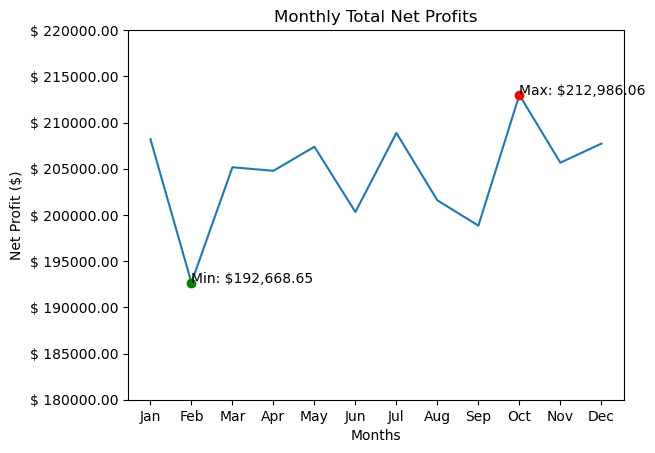

In [44]:
lit=df["NetProfit_float"].tolist()

plt.plot(df.index.values,lit)
# plt.yaxis.set_major_formatter('${x:1,.2f}')


ymax= max(df["NetProfit_float"])
xmax= df["NetProfit_float"].idxmax()
ymin= min(df["NetProfit_float"])
xmin= df["NetProfit_float"].idxmin()
# ymin=min(df["NetProfit_float"])
plt.plot(xmax,ymax, marker='o', color="red")
plt.text(xmax,ymax, f"Max: ${ymax:,.2f}")
plt.text(xmin,ymin, f"Min: ${ymin:,.2f}")
plt.plot(xmin,ymin, marker='o', color="green")
# plt.legend(loc="upper right")
plt.title("Monthly Total Net Profits")
plt.xlabel("Months")
plt.ylabel("Net Profit ($)")

lit=[180000, 185000, 190000, 195000, 200000, 205000,210000,215000,220000]
li = [f"$ {y:.2f}" for y in lit]

plt.yticks(lit, li)
plt.xticks(df.index.values,df["Month"])
plt.show()

---
# Monthly Gross Profits per Product

In [259]:
def sal(month):    
    sales_df=sales[month].copy()
    sales_df.drop(["Date", "InvoiceNumber"], axis=1, inplace=True)
    sales_df = pd.merge(sales_df, products, left_on="ProductId", right_index=True, how="outer")
    sales_df=pd.merge(sales_df, customers["State"], left_on="CustomerId", right_index=True)
    sales_df.drop("CustomerId", axis=1, inplace=True)
    sales_df.rename(columns={"State": "Abbreviation"}, inplace=True)
    sales_df = pd.merge(sales_df, states_df, left_on="Abbreviation", right_index=True)
    sales_df.drop("Abbreviation", axis=1, inplace=True)                      
    sales_df = pd.merge(sales_df, tax_rates["Rate"], left_on="State", right_index=True)
    sales_df.rename(columns={"Rate": "Tax"}, inplace=True)
    sales_df.drop("State", axis=1, inplace=True)
    sales_df.reset_index(inplace=True)
    sales_df.drop("index", axis=1, inplace=True)
    sales_df["Month"]=month
    sales_df["Revenue"]=(sales_df["Price"] *sales_df["Quantity"] * (1 + sales_df["Tax"]))
    return sales_df

# df1=sal(01)
mon=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df= pd.concat([sal(i) for i in range(0, 12,1)])
df["Month1"]=df["Month"].apply(lambda x: mon[x])
df

df["GrossProfit"]= (df["Price"] - df["Cost"]) *df["Quantity"]
df=df.groupby(["Month1", "ProductId"])["GrossProfit"].sum().reset_index()
# df=df.groupby(["MoProductId"])["GrossProfit"].sum().reset_index()
df.set_index("ProductId", inplace=True)
# df=df.groupby([df.index.values])["GrossProfit"].sum().reset_index()

df1=df.loc["Bauble",:].copy()
df2=df.loc["Doodad",:].copy()
df3=df.loc["Fidget",:].copy()
df4=df.loc["Gadget",:].copy()
df5=df.loc["Gewgaw",:].copy()
df6=df.loc["Gizmo",:].copy()
df7=df.loc["Trinket",:].copy()
df8=df.loc["Widget",:].copy()

df

,Month1,GrossProfit
ProductId,,
Bauble,Apr,13094.40
Doodad,Apr,15191.40
Fidget,Apr,47079.24
Gadget,Apr,44700.08
Gewgaw,Apr,21098.00
...,...,...
Gadget,Sep,43844.52
Gewgaw,Sep,21565.50
Gizmo,Sep,32791.50


---
# Problem 3

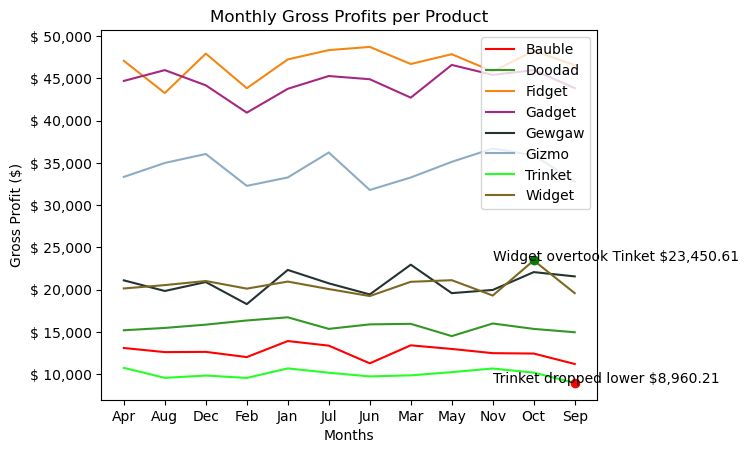

In [303]:
plt.plot(df1["Month1"],df1["GrossProfit"], color="red", label="Bauble")
plt.plot(df2["Month1"],df2["GrossProfit"], color = "#339726", label="Doodad")
plt.plot(df3["Month1"],df3["GrossProfit"], color = "#f38711", label="Fidget")
plt.plot(df4["Month1"],df4["GrossProfit"], color = "#a62781", label="Gadget")
plt.plot(df5["Month1"],df5["GrossProfit"], color = "#233332", label="Gewgaw")
plt.plot(df6["Month1"],df6["GrossProfit"], color = "#8dacc2", label="Gizmo")
plt.plot(df7["Month1"],df7["GrossProfit"], color = "#26fe28", label="Trinket")
plt.plot(df8["Month1"],df8["GrossProfit"], color = "#7d6821", label="Widget")
# plt.plot(df["ProductId"],df.GrossProfit)

ymax= max(df8["GrossProfit"])
# xmax= df["Month1"].idxmax()
ymin= min(df7["GrossProfit"])
# xmin= df["GrossProfit_float"].idxmin()

plt.plot("Oct",ymax, marker='o', color="green")
plt.text("Nov",ymax, f"Widget overtook Tinket ${ymax:,.2f}")
plt.text("Nov",ymin, f"Trinket dropped lower ${ymin:,.2f}")
plt.plot("Sep",ymin, marker='o', color="red")

lit=[10000, 15000, 20000, 25000,30000, 35000,40000,45000,50000]
li = [f"$ {y:,}" for y in lit]

plt.legend(loc="upper right")
plt.title("Monthly Gross Profits per Product")
plt.xlabel("Months")
plt.ylabel("Gross Profit ($)")
plt.yticks(lit, li)
# plt.xticks(df.index.values,df["Month"])
plt.show()

In [47]:
all_sales= pd.concat(sales)
all_sales

,InvoiceNumber,CustomerId,Date,ProductId,Quantity
0,7500,1699,2020-01-01,Fidget,16
1,7500,1699,2020-01-01,Fidget,4
2,7501,2001,2020-01-01,Fidget,6
3,7501,2001,2020-01-01,Bauble,1
4,7501,2001,2020-01-01,Gadget,13
...,...,...,...,...,...
6149,22139,1459,2020-12-31,Gewgaw,16
6150,22139,1459,2020-12-31,Gewgaw,6
6151,22139,1459,2020-12-31,Trinket,19
6152,22139,1459,2020-12-31,Fidget,19


In [121]:
sales_df=all_sales.copy()
sales_df.drop(["Date", "InvoiceNumber"], axis=1, inplace=True)
sales_df.head()

,CustomerId,ProductId,Quantity
0,1699,Fidget,16
1,1699,Fidget,4
2,2001,Fidget,6
3,2001,Bauble,1
4,2001,Gadget,13


In [122]:
    sales_df = pd.merge(sales_df, products, left_on="ProductId", right_index=True, how="outer")
    sales_df=pd.merge(sales_df, customers["State"], left_on="CustomerId", right_index=True, how="outer")
    sales_df.drop("CustomerId", axis=1, inplace=True)
    sales_df.rename(columns={"State": "Abbreviation"}, inplace=True)
    sales_df = pd.merge(sales_df, states_df, left_on="Abbreviation", right_index=True)
    sales_df.drop("Abbreviation", axis=1, inplace=True)                      
    sales_df = pd.merge(sales_df, tax_rates["Rate"], left_on="State", right_index=True)
    sales_df.rename(columns={"Rate": "Tax"}, inplace=True)
    sales_df.drop("State", axis=1, inplace=True)
    sales_df.reset_index(inplace=True)
    sales_df.drop("index", axis=1, inplace=True)
    sales_df["Revenue"]=(sales_df["Price"] *sales_df["Quantity"] * (1 + sales_df["Tax"]))
#     sales_df.sort_values("ProductId", inplace=True)
    sales_df

,ProductId,Quantity,Price,Cost,Tax,Revenue
0,Fidget,16,12.99,6.81,0.0625,220.83
1,Fidget,4,12.99,6.81,0.0625,55.2075
2,Fidget,14,12.99,6.81,0.0625,193.22625
3,Fidget,8,12.99,6.81,0.0625,110.415
4,Fidget,19,12.99,6.81,0.0625,262.235625
...,...,...,...,...,...,...
72959,Gewgaw,12,3.50,0.75,0.06,44.52
72960,Gewgaw,7,3.50,0.75,0.06,25.97
72961,Gewgaw,17,3.50,0.75,0.06,63.07
72962,Gewgaw,16,3.50,0.75,0.06,59.36


In [123]:
product_revenue=sales_df.groupby(["ProductId"])["Revenue"].sum().reset_index()
product_revenue.set_index("ProductId", inplace=True)
product_revenue.sort_values("Revenue", inplace=True)
product_revenue["RevenueReadable"]=product_revenue["Revenue"].apply(lambda x: f"$ {x:,.2f}")
product_revenue

,Revenue,RevenueReadable
ProductId,,
Bauble,179175.904,"$ 179,175.90"
Doodad,235723.88375,"$ 235,723.88"
Gewgaw,334158.957125,"$ 334,158.96"
Widget,535844.64725,"$ 535,844.65"
Trinket,738938.73075,"$ 738,938.73"
Gizmo,750402.48969,"$ 750,402.49"
Gadget,961214.640682,"$ 961,214.64"
Fidget,1245693.17082,"$ 1,245,693.17"


---

In [124]:
df=all_sales.copy()
product_quantity=df.groupby(["ProductId"])["Quantity"].sum().reset_index()
product_quantity.set_index("ProductId", inplace=True)
product_quantity["QuantityReadable"]=product_quantity["Quantity"].apply(lambda x: f"{x:,}")
product_quantity

,Quantity,QuantityReadable
ProductId,,
Bauble,91774,"91,774"
Doodad,89330,"89,330"
Fidget,90880,"90,880"
Gadget,91178,"91,178"
Gewgaw,90463,"90,463"
Gizmo,91502,"91,502"
Trinket,90348,"90,348"
Widget,92305,"92,305"


---


In [125]:
df=all_sales.copy()
df.drop(["InvoiceNumber", "CustomerId", "Date"], axis=1, inplace=True)
df = pd.merge(df, products, left_on="ProductId", right_index=True)
df["GrossProfit"]= (df["Price"] - df["Cost"]) *df["Quantity"]
df

,ProductId,Quantity,Price,Cost,GrossProfit
0,Fidget,16,12.99,6.81,98.88
1,Fidget,4,12.99,6.81,24.72
2,Fidget,6,12.99,6.81,37.08
15,Fidget,18,12.99,6.81,111.24
22,Fidget,17,12.99,6.81,105.06
...,...,...,...,...,...
6131,Gewgaw,10,3.50,0.75,27.50
6134,Gewgaw,4,3.50,0.75,11.00
6140,Gewgaw,19,3.50,0.75,52.25
6149,Gewgaw,16,3.50,0.75,44.00


In [126]:
product_gross_profit= df.groupby(["ProductId"])["GrossProfit"].sum().reset_index()
product_gross_profit.set_index("ProductId", inplace=True)
product_gross_profit["GrossProfitReadable"]=product_gross_profit["GrossProfit"].apply(lambda x: f"$ {x:,.2f}")
# product_gross_profit.sort_values("GrossProfit")
product_gross_profit

,GrossProfit,GrossProfitReadable
ProductId,,
Bauble,151427.10,"$ 151,427.10"
Doodad,187593.00,"$ 187,593.00"
Fidget,561638.40,"$ 561,638.40"
Gadget,534303.08,"$ 534,303.08"
Gewgaw,248773.25,"$ 248,773.25"
Gizmo,411759.00,"$ 411,759.00"
Trinket,120162.84,"$ 120,162.84"
Widget,246454.35,"$ 246,454.35"


# Monthly Gross Profits per Product

---


In [127]:
df = pd.merge(product_revenue, product_quantity, left_index=True, right_index=True)
df=pd.merge(df, product_gross_profit, left_index=True, right_index=True)
# df.sort_values("GrossProfit", inplace=True)
# df.drop(["Revenue", "Quantity", "GrossProfit"], axis=1, inplace=True)
df

,Revenue,RevenueReadable,Quantity,QuantityReadable,GrossProfit,GrossProfitReadable
ProductId,,,,,,
Bauble,179175.904,"$ 179,175.90",91774,"91,774",151427.10,"$ 151,427.10"
Doodad,235723.88375,"$ 235,723.88",89330,"89,330",187593.00,"$ 187,593.00"
Gewgaw,334158.957125,"$ 334,158.96",90463,"90,463",248773.25,"$ 248,773.25"
Widget,535844.64725,"$ 535,844.65",92305,"92,305",246454.35,"$ 246,454.35"
Trinket,738938.73075,"$ 738,938.73",90348,"90,348",120162.84,"$ 120,162.84"
Gizmo,750402.48969,"$ 750,402.49",91502,"91,502",411759.00,"$ 411,759.00"
Gadget,961214.640682,"$ 961,214.64",91178,"91,178",534303.08,"$ 534,303.08"
Fidget,1245693.17082,"$ 1,245,693.17",90880,"90,880",561638.40,"$ 561,638.40"


---
# Problem 3

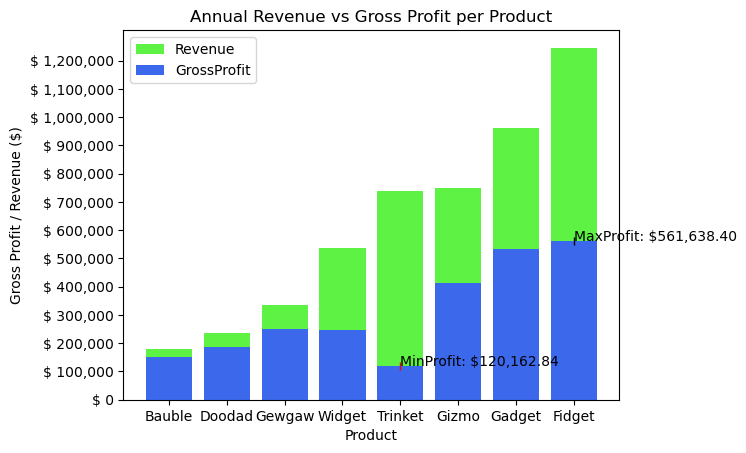

In [143]:
plt.bar(df.index.values , df["Revenue"], color="#5ef245", label="Revenue")
plt.bar(df.index.values , df["GrossProfit"],color ="#3c68ec", label="GrossProfit")
# plt.plot(product_gross_profit.index.values,product_gross_profit["GrossProfit"])
ymax= max(df["GrossProfit"])
xmax= df["GrossProfit"].idxmax()
ymin= min(df["GrossProfit"])
xmin= df["GrossProfit"].idxmin()

plt.plot(xmax,ymax, marker='|', color="black")
plt.text(xmax,ymax, f"MaxProfit: ${ymax:,.2f}")

plt.text(xmin,ymin, f"MinProfit: ${ymin:,.2f}")
plt.plot(xmin,ymin, marker='|', color="red" )

plt.legend(loc="upper left")
plt.title("Annual Revenue vs Gross Profit per Product")
plt.xlabel("Product")
plt.ylabel("Gross Profit / Revenue ($)")

lit=[0, 100000, 200000, 300000, 400000, 500000, 600000,700000, 800000, 900000, 1000000, 1100000, 1200000]
li = [f"$ {y:,}" for y in lit]

plt.yticks(lit, li)
# plt.xticks(df.index.values,df["Month"])
plt.show()